In [ ]:
!pip install CoolProp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 26.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Thermo-thesis/')

In [ ]:
from sCO2Utils import *

# Simulating ideal Rankine

Parameters chosen:
1. Ambient T = 10C
2. Warm Reservoir T = 100C
3. Max Pressure = 35MPa
4. Min Pressure = 5 Mpa

We will choose the state pressure after the condenser to be P1 = 5MPa and then vary the pressure ration P2/P1 from a min of 7.5/5 = 1.5 to a maximum of 7 to study the power cycle efficiency


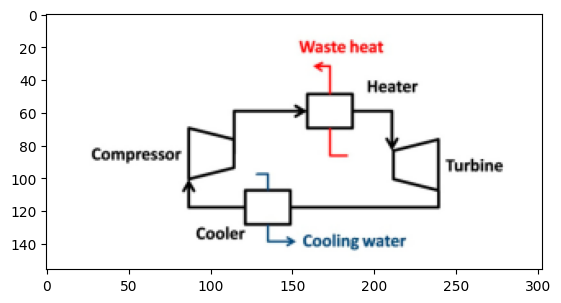

In [ ]:
img = plt.imread('Simple_setup.png')
plt.imshow(img)

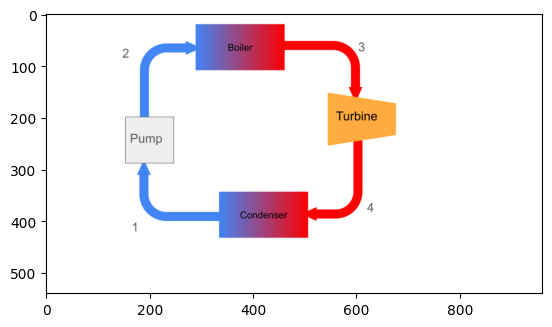

In [ ]:
img = plt.imread('simple-Rankine.png')
plt.imshow(img)

In [ ]:
def resolve_simple_cycle(
    P1 : float,
    rp : float,
    turbine_isentropic_efficiency : float,
    pump_isentropic_efficiency : float,
    T1 : float,
    T3 : float,
):

  P2 = P1*rp # Changing the pressure ratio

  turbine = Turbine(isentropic_efficiency=turbine_isentropic_efficiency,output_pressure=P1)
  pump = Pump(isentropic_efficiency=pump_isentropic_efficiency,output_pressure=P2)

  state1 = ThermodynamicState(p = P1,t = T1); state1.compute_from_p_t()
  state3 = ThermodynamicState(p = P2,t = T3); state3.compute_from_p_t()

  state2 = pump.resolve_actual_output_state(input_state = state1)
  state4 = turbine.resolve_actual_output_state(input_state = state3)

  qout = state4.h -state1.h
  qin = state3.h - state2.h
  eta_rankine = 1 - qout/qin

  return [eta_rankine, [state1,state2,state3,state4]]

In [ ]:
# INITIAL CONDITIONS
P1 = 5e6
T1 = 273+10
T3 = 273+100
pump_isentropic_efficiency = .85
turbine_isentropic_efficiency = .85

In [ ]:
rp_min = 1.5
rp_max = 7
N = 50 # points
rp_list = list(np.linspace(rp_min,rp_max,N+1))

rankine_efficiency_list = []
for rp in rp_list:
  rankine_efficiency_list.append(resolve_simple_Rankine(
      P1 = P1,
      rp = rp,
      turbine_isentropic_efficiency= turbine_isentropic_efficiency,
      pump_isentropic_efficiency= pump_isentropic_efficiency,
      T1 = T1,
      T3 = T3
  )[0])

Text(0.5, 1.0, 'Efficiency vs Pressure Ratio Simple Rankine power cycle')

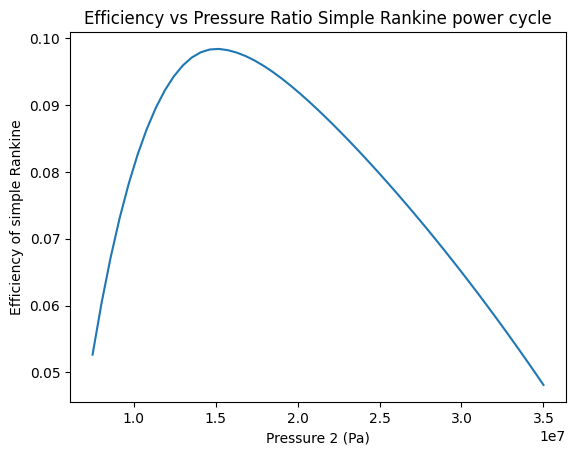

In [ ]:
fig,ax = plt.subplots(1,1)
ax.plot(np.array(rp_list)*P1, rankine_efficiency_list)
ax.set_xlabel('Pressure 2 (Pa)')
ax.set_ylabel('Efficiency of simple Rankine')
ax.set_title("Efficiency vs Pressure Ratio Simple Rankine power cycle")

In [ ]:
max_index = np.argmax(np.array(rankine_efficiency_list))
print(f'The maximum of efficiency of {"{:.2f}".format(rankine_efficiency_list[max_index]*100)} % is reached for rp = {rp_list[max_index]}')

The maximum of efficiency of 9.84 % is reached for rp = 3.04


In [ ]:
# Pick the best performing pressure ratio
rp_best = rp_list[max_index]
_eta, rankine_states_list = resolve_simple_cycle(
      P1 = P1,
      rp = rp_best,
      turbine_isentropic_efficiency= turbine_isentropic_efficiency,
      pump_isentropic_efficiency= pump_isentropic_efficiency,
      T1 = T1,
      T3 = T3
  )

In [ ]:
show_states_table(rankine_states_list)

   pressure (Pa)  temperature (K)  enthalpy (KJ/kg)  entropy (KJ/kgK)
1      5000000.0       283.000000        224.203122          1.080970
2     15000000.0       293.410231        237.425746          1.087740
3     15000000.0       373.000000        461.635631          1.762906
4      5000000.0       290.573390        426.342564          1.784428


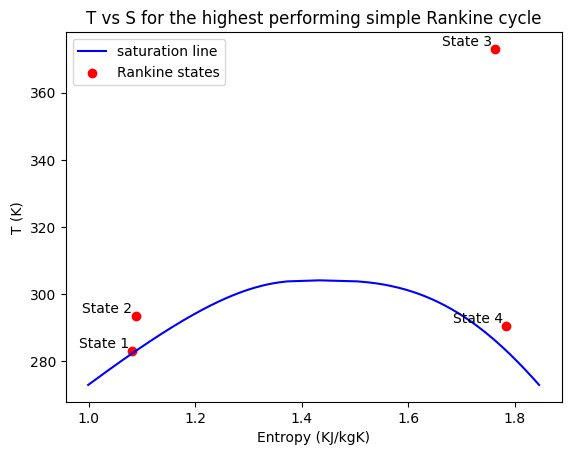

In [ ]:
fig, ax = plot_tvss_phase_transition_region(273, 'T vs S for the highest performing simple Rankine cycle')
rankine_state_xpoints = [state.s for state in rankine_states_list]
rankine_state_ypoints = [state.t for state in rankine_states_list]
ax.text(rankine_state_xpoints[0] - .1, rankine_state_ypoints[0] + 1,'State 1')
ax.text(rankine_state_xpoints[1] - .1, rankine_state_ypoints[1] + 1,'State 2')
ax.text(rankine_state_xpoints[2] - .1, rankine_state_ypoints[2] + 1,'State 3')
ax.text(rankine_state_xpoints[3] - .1, rankine_state_ypoints[3] + 1,'State 4')
ax.scatter(rankine_state_xpoints, rankine_state_ypoints, color = 'red', label = 'Rankine states')
ax.legend()

# Do the same for Brayton cycle

In [ ]:
# INITIAL CONDITIONS for Brayton
P1 = 7.5*1e6
T1 = 273+10
T3 = 273+100
pump_isentropic_efficiency = .85
turbine_isentropic_efficiency = .85

In [ ]:
rp_min = 1.5
rp_max = 4.67
N = 20 # points
rp_list = list(np.linspace(rp_min,rp_max,N+1))

brayton_efficiency_list = []
for rp in rp_list:
  brayton_efficiency_list.append(resolve_simple_cycle(
      P1 = P1,
      rp = rp,
      turbine_isentropic_efficiency= turbine_isentropic_efficiency,
      pump_isentropic_efficiency= pump_isentropic_efficiency,
      T1 = T1,
      T3 = T3
  )[0])

Text(0.5, 1.0, 'Efficiency vs Pressure Ratio Simple Brayton power cycle')

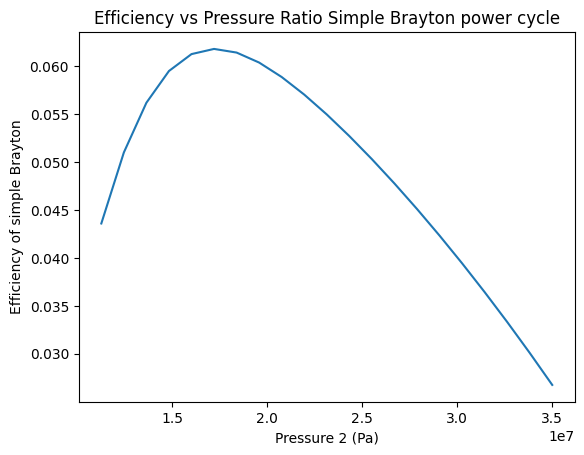

In [ ]:
fig,ax = plt.subplots(1,1)
ax.plot(np.array(rp_list)*P1, brayton_efficiency_list)
ax.set_xlabel('Pressure 2 (Pa)')
ax.set_ylabel('Efficiency of simple Brayton')
ax.set_title("Efficiency vs Pressure Ratio Simple Brayton power cycle")

In [ ]:
max_index = np.argmax(np.array(brayton_efficiency_list))
print(f'The maximum of efficiency of {"{:.2f}".format(brayton_efficiency_list[max_index]*100)} % is reached for rp = {rp_list[max_index]}, or P2 = {rp_list[max_index]*7.5} MPa')

The maximum of efficiency of 6.18 % is reached for rp = 2.2925, or P2 = 17.19375 MPa


In [ ]:
# Pick the best performing pressure ratio
rp_best = rp_list[max_index]
_eta, brayton_states_list = resolve_simple_cycle(
      P1 = P1,
      rp = rp_best,
      turbine_isentropic_efficiency= turbine_isentropic_efficiency,
      pump_isentropic_efficiency= pump_isentropic_efficiency,
      T1 = T1,
      T3 = T3
  )

In [ ]:
show_states_table(brayton_states_list)

   pressure (Pa)  temperature (K)  enthalpy (KJ/kg)  entropy (KJ/kgK)
1      7500000.0       283.000000        220.256856          1.057048
2     17193750.0       291.947534        232.718790          1.063460
3     17193750.0       373.000000        444.257756          1.700253
4      7500000.0       312.947238        418.726402          1.714680


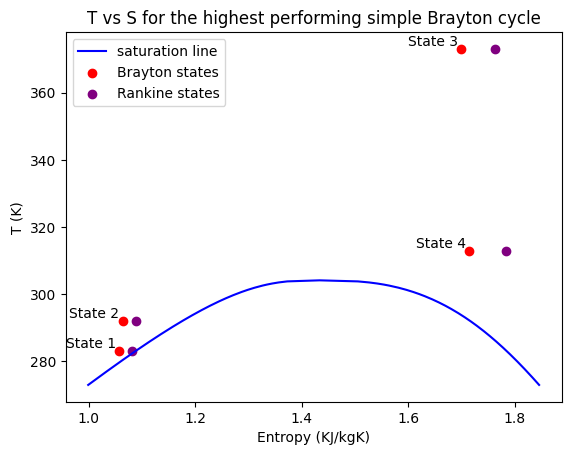

In [ ]:
fig, ax = plot_tvss_phase_transition_region(273, 'T vs S for the highest performing simple Brayton cycle')
brayton_state_xpoints = [state.s for state in brayton_states_list]
brayton_state_ypoints = [state.t for state in brayton_states_list]
ax.text(brayton_state_xpoints[0] - .1, brayton_state_ypoints[0] + 1,'State 1')
ax.text(brayton_state_xpoints[1] - .1, brayton_state_ypoints[1] + 1,'State 2')
ax.text(brayton_state_xpoints[2] - .1, brayton_state_ypoints[2] + 1,'State 3')
ax.text(brayton_state_xpoints[3] - .1, brayton_state_ypoints[3] + 1,'State 4')
ax.scatter(brayton_state_xpoints, brayton_state_ypoints, color = 'red', label = 'Brayton states')
ax.scatter(rankine_state_xpoints, rankine_state_ypoints, color = 'purple', label = 'Rankine states')
ax.legend()